Purpose: to take two tiffs from (1) a slice of a brain aligned to an atlas and (2) the same slice from the atlas and make a checkerboard patterned 'merge' of the two images. This is something I've seen in the literature and wanted to mimic -- the notebook is nice because it allows for immediate visualization and adjustments of the grid sizes depending on the type of slices (sagittal, axial, coronal) and sizes of the images.

In [1]:
import os, sys, time
import tifffile as tif
from scipy.ndimage.interpolation import zoom
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

In [136]:
# add file location info
src = "/Users/emilydennis/Desktop"
alignedslice = os.path.join(src, "299_k315.tif")
atlasslice = os.path.join(src, "299_wh.tif")
checkerboardsavepath = os.path.join(src,'checkerboard_299_k15_wh.tiff')

In [124]:
# read in files and convert to same range
atlas = tif.imread(atlasslice).astype('float64')
atlas = atlas-atlas.min()
atlas *= (255/atlas.max())
aligned = tif.imread(alignedslice).astype('float64')
aligned = aligned-aligned.min()
aligned *= (255/aligned.max())

In [125]:
# find the shape of the image
xs,ys=np.shape(atlas)

In [126]:
# figure out how big the grids should be
gridsize = 50
xdiv = np.floor(xs/50).astype('int')
ydiv = np.floor(ys/50).astype('int')

In [127]:
checkerboard = atlas

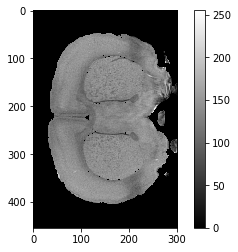

In [128]:
plt.imshow(checkerboard, cmap='gray')
plt.colorbar()

In [131]:
for i in range(0,xdiv,2):
    for j in range(0,ydiv,2):
        newbit = aligned[(i*gridsize):((i+1)*gridsize),(j*gridsize):((j+1)*gridsize)]
        checkerboard[(i*gridsize):((i+1)*gridsize),(j*gridsize):((j+1)*gridsize)]=newbit
for i in range(1,xdiv,2):
    for j in range(1,ydiv,2):
        checkerboard[(i*gridsize):((i+1)*gridsize),(j*gridsize):((j+1)*gridsize)]=aligned[(i*gridsize):((i+1)*gridsize),(j*gridsize):((j+1)*gridsize)]

In [137]:
plt.imsave(checkerboardsavepath,checkerboard)